In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '2d7af626-d5c8-4575-a791-7993a62e8ab9'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(38, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.810408,1.000000,0.000000,0.813200,1.000000,0.000000,0.809664,1.000000,0.000000,0.811400
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 23:13:41.654,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.759382,1.000000,0.000000,0.758641,1.000000,0.000000,0.759602,1.000000,0.000000,0.759130
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.587542,0.533262,0.819565,0.588406,0.537386,0.810515,0.581186,0.526167,0.815228,0.584730
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 23:13:41.654,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.649444,0.594481,0.822906,0.648339,0.592926,0.822514,0.650555,0.596003,0.822925,0.649466
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.810518,1.000000,0.000000,0.782547,1.000000,0.000000,0.821973,1.000000,0.000000,0.804762
5,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 23:13:41.654,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.657875,1.000000,0.000000,0.656747,1.000000,0.000000,0.659521,1.000000,0.000000,0.658161
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.186574,0.000000,1.000000,0.201742,0.000000,1.000000,0.180586,0.000000,1.000000,0.189702
7,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 23:13:41.654,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.231250,0.000000,1.000000,0.231556,0.000000,1.000000,0.231194,0.000000,1.000000,0.231371
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.192591,0.000000,1.000000,0.175932,0.000000,1.000000,0.201609,0.000000,1.000000,0.187584
9,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-14 23:13:41.654,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.244651,0.000000,1.000000,0.245570,0.000000,1.000000,0.244396,0.000000,1.000000,0.244974


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.810408,1.000000,0.000000,0.813200,1.000000,0.000000,0.809664,1.000000,0.000000,0.811400
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.587542,0.533262,0.819565,0.588406,0.537386,0.810515,0.581186,0.526167,0.815228,0.584730
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.810518,1.000000,0.000000,0.782547,1.000000,0.000000,0.821973,1.000000,0.000000,0.804762
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.186574,0.000000,1.000000,0.201742,0.000000,1.000000,0.180586,0.000000,1.000000,0.189702
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.192591,0.000000,1.000000,0.175932,0.000000,1.000000,0.201609,0.000000,1.000000,0.187584
10,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.068090,0.061520,0.096174,0.067202,0.061420,0.092370,0.067340,0.060720,0.095501,0.067272
12,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.085091,0.059376,0.195009,0.082787,0.058968,0.186478,0.082459,0.057739,0.187616,0.082620
14,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.899562,0.930457,0.767498,0.902220,0.930862,0.777535,0.902887,0.932654,0.776264,0.902560
16,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.507538,0.512356,0.486943,0.555167,0.573605,0.474902,0.484722,0.482572,0.493870,0.519304
18,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-14 23:13:41.649,2d7af626-d5c8-4575-a791-7993a62e8ab9,Exp_iter_1,...,0.609141,0.553307,0.847805,0.609605,0.557258,0.837486,0.602639,0.546142,0.842969,0.606058


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.021156,-0.032068,-0.031455,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.025677,-0.029215,-0.030397,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.021156,0.032068,0.031455,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.046673,1.057651,1.065728,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.046382,0.057757,0.066199,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.003536,0.004144,0.007433,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,0.999261,1.015851,1.024987,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.000138,-0.005289,-0.006132,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.000077,-0.004645,-0.005380,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.998757,0.926684,0.914410,RandomForestClassifier,Exp_iter_1,0.7,0


In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.021156,-0.032068,-0.031455,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.025677,-0.029215,-0.030397,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.021156,0.032068,0.031455,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.046673,1.057651,1.065728,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.046382,0.057757,0.066199,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [16]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

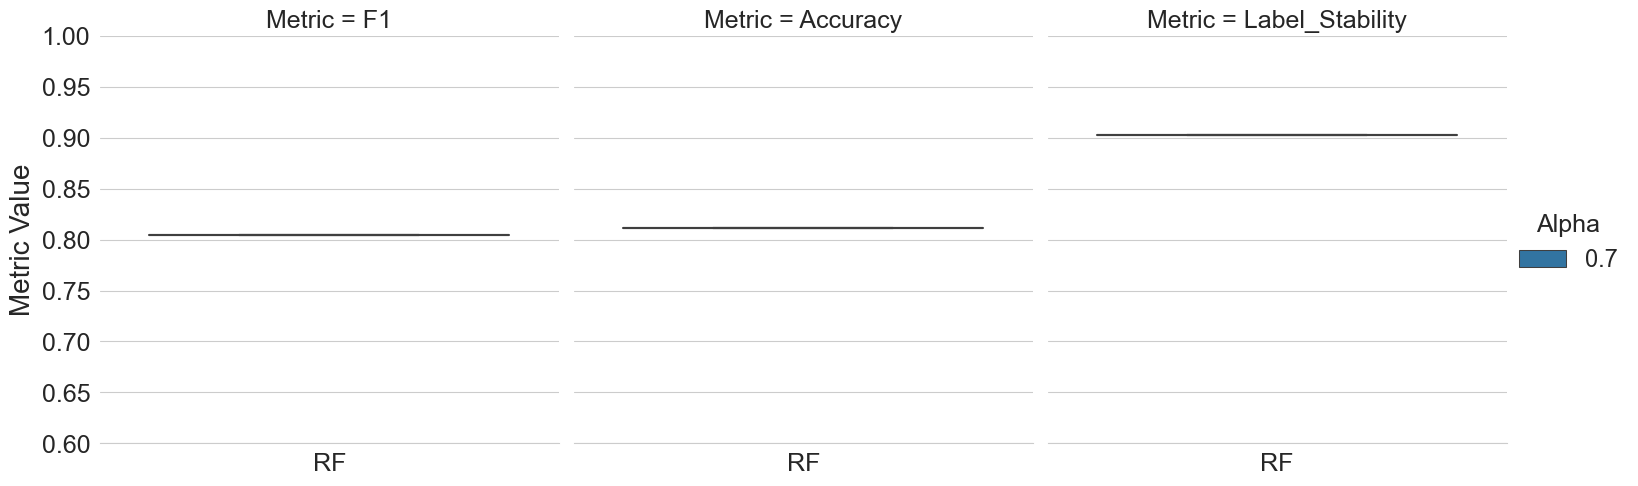

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

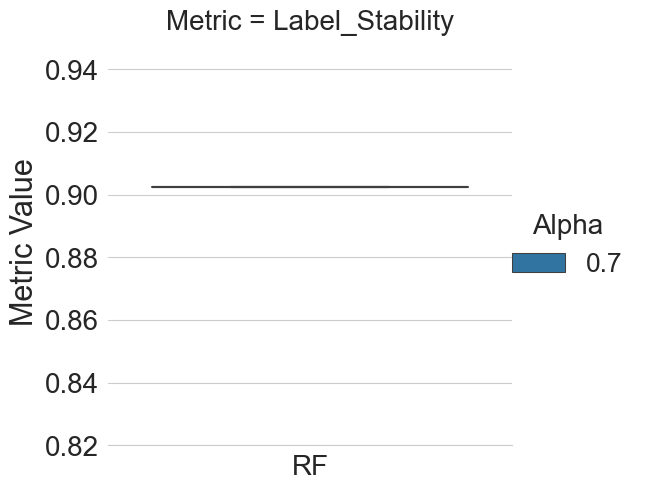

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

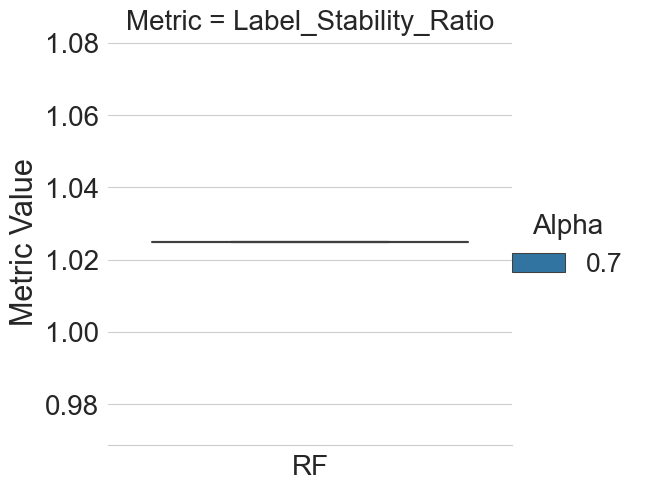

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

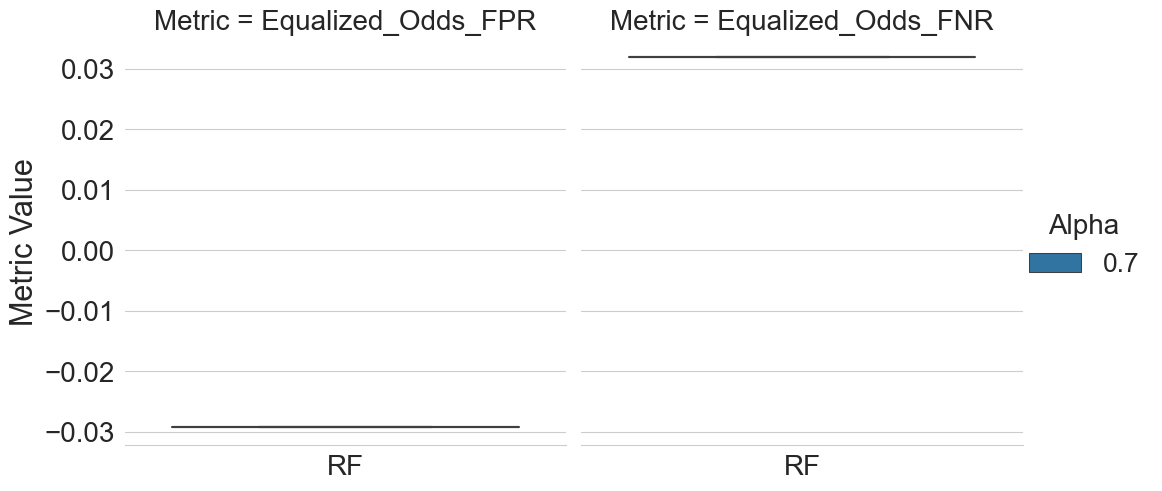

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [21]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 1200x600 with 0 Axes>

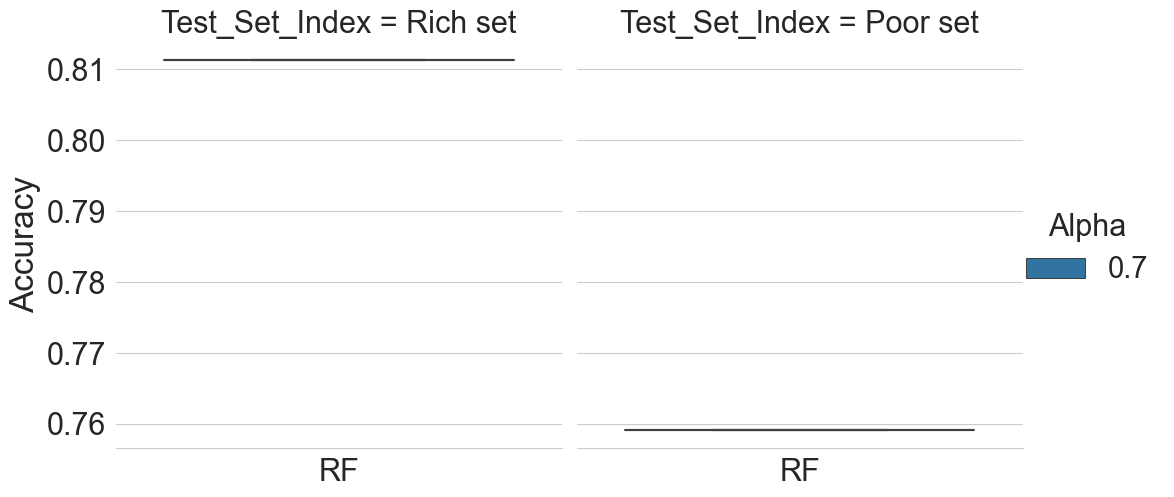

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

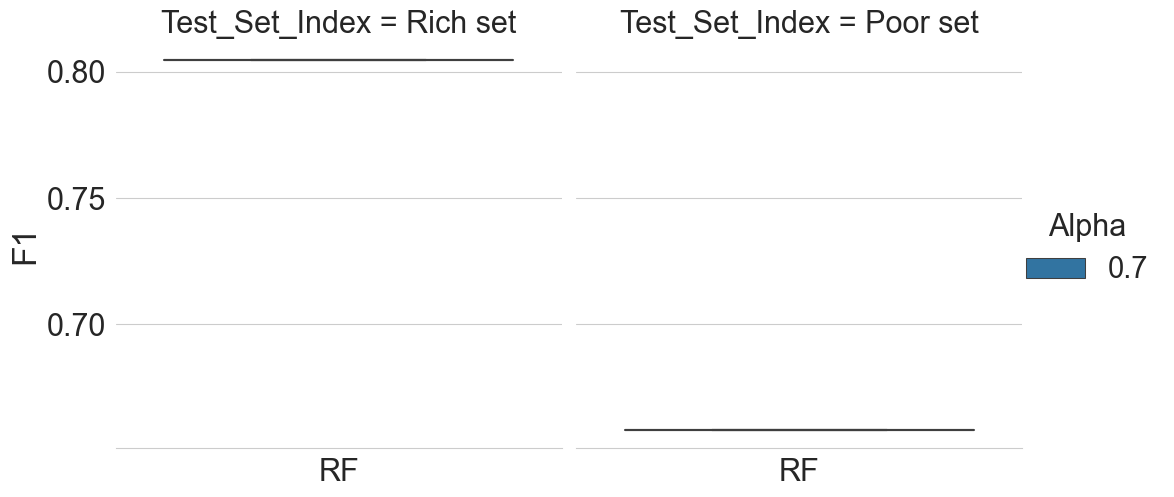

In [28]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

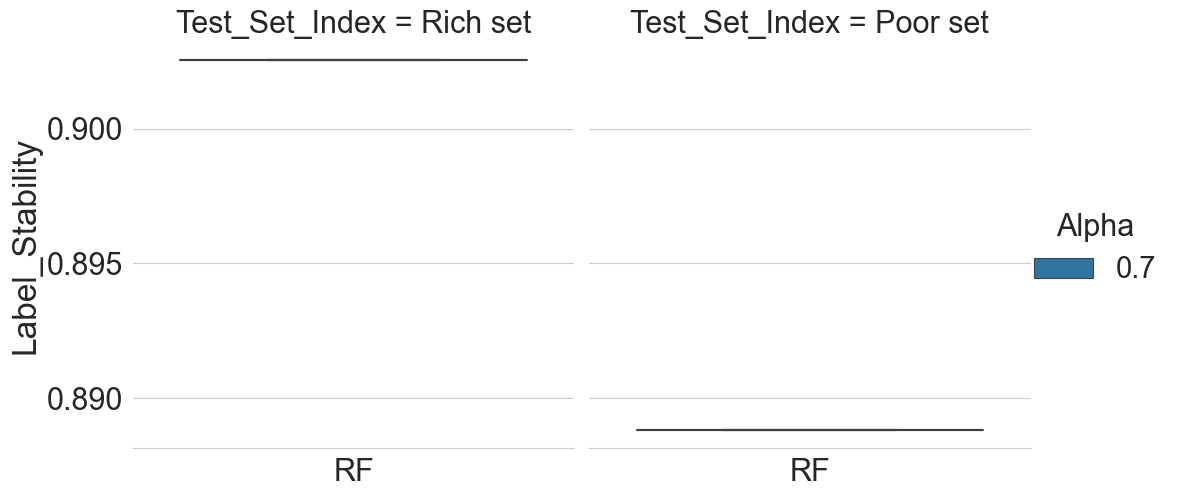

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

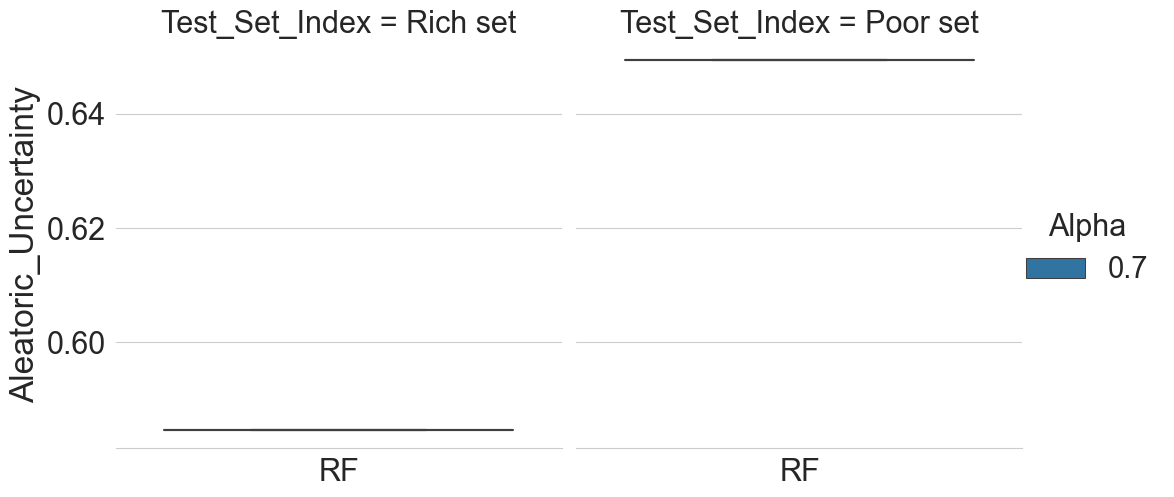

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

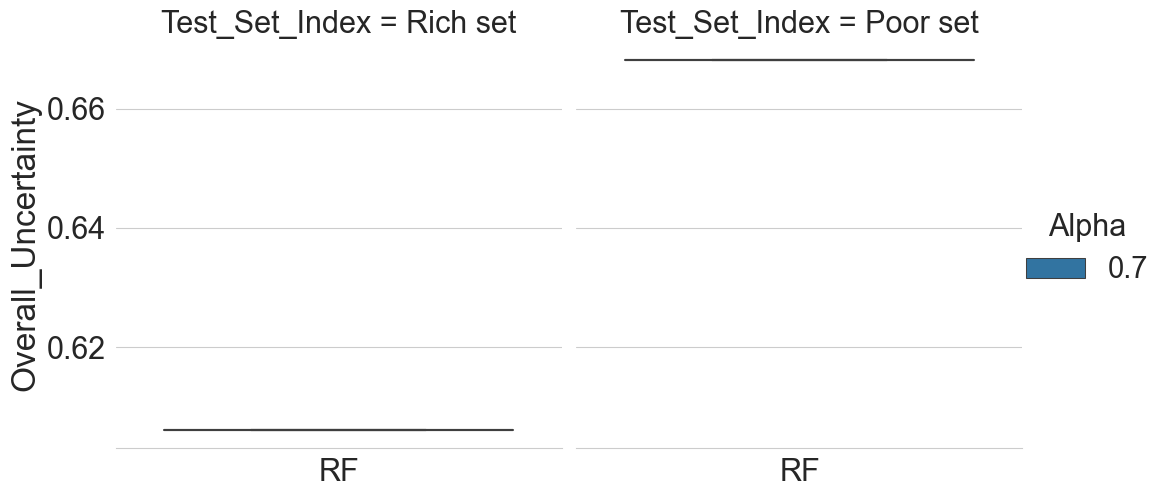

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

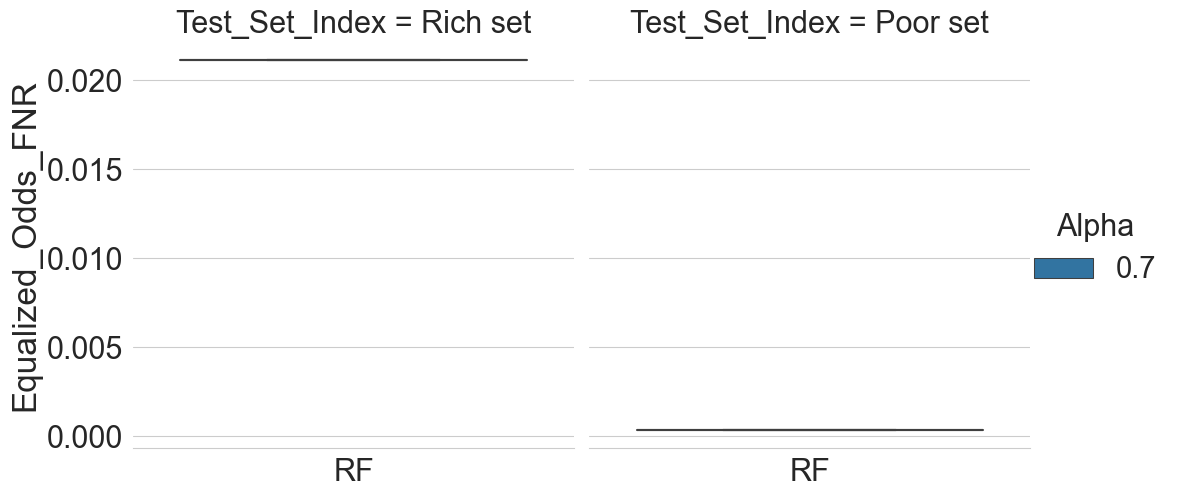

In [24]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)